# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 11 octubre, 2019


# Módulo 3 - Contenidos
- Pandas y DataFrames
- Acceso a SQL a través de Pandas

Introduction to Pandas: http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/
DataFrame API: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

In [215]:
#paquetes preliminares
from IPython.display import Markdown, display
def printbf(string):
    display(Markdown('**'+string+'**'))

## 0) Estructuras de datos
En Python tenemos distintas maneras de guardar y manejar estructuras de datos. Lo más básicos en que vamos a enfocar son los números (`3` o `4.5` o `8e10`), palabrras (`"example"`) y variables lógicas o _booleanas_ (`True` o `False`). Con estos elementos podemos construir estructuras de datos más complejos, por ejemplo listas, diccionarios o tuplas; los cuales veremos a continuación.

Las **listas** y **tuplas** son objetos ordenados de múltiple elementos que pueden tener distintos tipos de datos, pueden considerarse coom arreglos de datos de cualquier tipo. Las tuplas son inmutables, lo que quiere decir que no pueden ser modificadas una vez que son creadas. Las listas, por el contrario, son mutables y se les puede agregar o elimilar elementos. Los índices tanto en las listas como en las tuplas son siempre son números ordenados. Los diccionarios por su parte son conjuntos de datos en los que los índices no son necesariamente ordenados y pueden ser otros tipos de datos, por ejemple palabras, o _strings,_ o números con decimales.

Una lista puede ser construida directamente con sus valores usando los delimitadores `[` y `]`:

In [216]:
lista = [3, 5, 2, 8, 1, 'texto']
lista

[3, 5, 2, 8, 1, 'texto']

In [217]:
#podemos acceder a un elemento de la lista de la siguiente forma 
lista[2]

2

Podemos cambiar los valores según asignación. También agregar nuevos valores es posible.

In [218]:
lista[2] = 99
lista

[3, 5, 99, 8, 1, 'texto']

In [219]:
lista.append(1500)
lista

[3, 5, 99, 8, 1, 'texto', 1500]

Así podemos acceder el quinto elemento (que tiene índice `4`) que contiene el valor `1`. Recordemos que los índices comienzan desde `0`, tal como los siglos: estamos en siglo 21 aunque el año está 2019.

Las tuplas, por su parte, son como listas pero no se pueden agregar o eliminar elementos. En Python las tuplas son usadas por ejemplo para los parámetros y retornos de funciónes (que son básicamente listas de distintos tipos de datos). Una tupla se instancia con los delimitadores  `(` y `)`:

In [220]:
tup = (5, "text", [3.2, 4.5])
len(tup[2])

2

In [221]:
tup[0]

5

¡Con tuplas no podemos cambiar los valores ni agregarlos!

In [222]:
tup[2] = 9

TypeError: 'tuple' object does not support item assignment

Finalmente, en los disccionarios podemos acceder elementos a través de textos u otros números no ordenados. Esta estructura de datos se instancia con los delimitadores `{` y `}`:

In [223]:
diccionario = {'a': 5, 'b': 7, 9.3: 9}
diccionario

{'a': 5, 'b': 7, 9.3: 9}

In [224]:
diccionario['b']

7

A continuación veremos cómo Pandas usa y extiende las estructuras de datos de Python.

## 1) Introducción
El manejo adecuado de datos es (naturalmente) un aspecto fundamental en ciencia de datos. Como se ha visto, NumPy permite un manejo básico de datos a través de sus operaciones sobre arreglos. No obstante, las tareas referentes al manejo de datos requieren habitualmente de funcionalidades más especificas.

### ¿Qué es Pandas?

Pandas es una librería open source para análisis de datos. Python siempre ha sido fantástico para preparar y montar datos, sin embargo, Python no es necesariamente bueno cuando hay que analizar datos. Uno regularmente termina usando R o cargando la base de datos usando SQL (o peor aún, Excel). 

Pandas hace que Python pueda ser usado satisfactoriamente para analizar datos. Podemos considerar Pandas como una extensión de NumPy basada en software libre y dirigida específicamente a la manipulación y análisis de datos en Python.

### ¿Cómo se relaciona Pandas con el resto de la suite de Python?

Pandas provee estructuras y operaciones para el trabajo de tablas numéricas y series de tiempo, es estándar en aplicaciones de ciencia de datos (basadas en Python). Se usa en conjunto con librerías de computación numérica (como Numpy y SciPy), librerías de visualización (como `matplotlib` y `seaborn`), librerías de analítica (como `statsmodels` y `scikit-learn`), entre otras.

El manejo de datos con Pandas toma los elementos de Numpy en cuanto a computación basada en arreglos y los expande al manejo de datos heterogéneos.



Como convención, Pandas se importa de la siguiente manera:

In [225]:
import pandas as pd

## 2) Estructuras de datos

Pandas propone dos nuevas estructuras de datos: Series y DataFrame, ambas construidas sobre NumPy (es decir, rápidas). Una serie es un objeto cuya estructura consiste en un arreglo unidimensional que contiene una sucesión de valores al cual se asocia un nuevo arreglo con las etiquetas de los datos, este último arreglo se denota como índice.

### 2.1) Series

Una Serie es un objeto unidimensional similar a un arreglo, lista, columna o tabla. La Serie tiene un índice asignado a cada ítem en la serie. Por defecto, cada ítem recibe un índice que va de 0 hasta N-1, donde N es el largo de la Serie.


In [226]:
# creamos una Serie con valores arbitrarios
s = pd.Series([12/10, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'])
print(s)

0                 1.2
1         BancoEstado
2                3.14
3         -1789710578
4    ¡Hoy es viernes!
dtype: object


In [227]:
s[1:3]  # imprimir el tercero elemento con index dos

1    BancoEstado
2           3.14
dtype: object

### 2.2) Índices
Los índices definen las referencias a los elementos o rangos de elementos en la serie. El índice puede ser numérico, textual, fechas, ...

In [228]:
#imprimir los indices  (valores por defecto)
#print(s.index.values)
s.index.values

array([0, 1, 2, 3, 4])

Podemos asignar nuestros propios valores de los índices de las siguientes formas, la primera es modificando el objeto `s.index`, es decir

In [229]:
s.index = ['i','n','d','e','x']
print(s)
print('\n')
print(s.index.values)

i                 1.2
n         BancoEstado
d                3.14
e         -1789710578
x    ¡Hoy es viernes!
dtype: object


['i' 'n' 'd' 'e' 'x']


Alternativamente, podemos construir la serie directamente con valores para sus índices:

In [230]:
s2 = pd.Series([7, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s2

A                   7
Z         BancoEstado
C                3.14
Y         -1789710578
E    ¡Hoy es viernes!
dtype: object

El constructor de la serie puede tomar un _diccionario_ también, pues recordemos que esta estructura de datos tiene valores arbitrarios para sus entradas. Veamos a  continuación la construcción de una serie que contiene los habitantes de las principales ciudades de Chile (en base a su población) desde un diccionario que contiene esa información. 

In [231]:
dicc = {'Santiago': 6139087, 'Concepción': 972714, 'Valparaíso': 951311, 
     'Coquimbo': 399450, 'Antofagasta': None}
ciudades = pd.Series(dicc)
ciudades

Santiago       6139087.0
Concepción      972714.0
Valparaíso      951311.0
Coquimbo        399450.0
Antofagasta          NaN
dtype: float64

Los índices sirven precisamente para referenciar (y cambiar!) los valores de la lista, en particular para _llamarlos_

In [232]:
#rescatar el valor para una ciudad
ciudades['Santiago']

6139087.0

In [233]:
#reasigna el valor para una ciudad
ciudades['Santiago'] = 6200000
print(ciudades['Santiago':'Concepción'])

Santiago      6200000.0
Concepción     972714.0
dtype: float64


In [234]:
#rescatar el valor para múltiples ciudades
ciudades[['Santiago','Valparaíso']]

Santiago      6200000.0
Valparaíso     951311.0
dtype: float64

Podemos incluso usar _indexacción booleana_ es decir:

In [235]:
printbf('estos son los booleans')
print(ciudades < 1000000)
printbf('estos son los valores')
print(ciudades[ciudades < 1000000])


**estos son los booleans**

Santiago       False
Concepción      True
Valparaíso      True
Coquimbo        True
Antofagasta    False
dtype: bool


**estos son los valores**

Concepción    972714.0
Valparaíso    951311.0
Coquimbo      399450.0
dtype: float64


Podemos seleccionar en multipla condiciones usando el operador `&` que signífica 'y / and', mientras el operador `|` signífica 'o / or'. Los paréntesis son necesarios.

In [236]:
ciudades[(ciudades > 500000) & (ciudades < 1000000)]

Concepción    972714.0
Valparaíso    951311.0
dtype: float64

para entender esto, veamos que el enunciado `ciudades > 500000` entrega un arreglo de variables booleanas (*True* y *False*) denotando las posiciones donde se cumple el enunciado. Luego, al pasar este arreglo booleano como _índices_ del arreglo, solo se reportan  los valores para las entradas _True_.

In [237]:
arreglo = ciudades > 500000
print('Arreglo de booleans es:')
print(arreglo)
print('\n')
print('Arreglo de ciudades es:')
print(ciudades[arreglo])

Arreglo de booleans es:
Santiago        True
Concepción      True
Valparaíso      True
Coquimbo       False
Antofagasta    False
dtype: bool


Arreglo de ciudades es:
Santiago      6200000.0
Concepción     972714.0
Valparaíso     951311.0
dtype: float64


Estos operadores booleanos sirven también para verificar si un índice pertenece a la serie, por ejemplo

In [238]:
print(('Valparaíso' in ciudades) and ('adsfgsdf' in ciudades))
#print('Peor es Nada' in ciudades)

False


Podemos incluso asignar rangos de fechas a nuestros índices usando el
método `pandas.date_range`

In [239]:
serie_con_fecha= pd.Series([7, 5, 3.14, -178, 0.27, 55])
serie_con_fecha.index = pd.date_range(start='2019-01-01', end='2019-01-06', freq='D')
serie_con_fecha

2019-01-01      7.00
2019-01-02      5.00
2019-01-03      3.14
2019-01-04   -178.00
2019-01-05      0.27
2019-01-06     55.00
Freq: D, dtype: float64

Finalmente, veamos que podemos asignar multiples índices usando  de fechas a nuestros índices usando la método `pandas.MultiIndex.from_arrays`

In [240]:
serie_multi = serie_con_fecha #reciclamos la serie anterior
serie_multi.index = pd.MultiIndex.from_arrays(
    [[0,0,0,1,1,1], ['a','b','c','a','b','c']])
serie_multi

0  a      7.00
   b      5.00
   c      3.14
1  a   -178.00
   b      0.27
   c     55.00
dtype: float64

La serie tiene dos índices. Un índice principal (`0` o `1`) y uno secundarios (`a`, `b`, `c`). Para acceder una sola fila, necesitamos entregar dos índices. Primero, accedemos al primer índice:

In [241]:
serie_multi[1]

a   -178.00
b      0.27
c     55.00
dtype: float64

Después podemos acceder una fila sola con el segundo índice:

In [242]:
serie_multi[1,'b']

0.27

Es posible seleccionar el segundo índice solo también, por usar el cáracter `:` que signífica seleccionar todo de ese índice.

In [243]:
serie_multi[:,'b']

0    5.00
1    0.27
dtype: float64

Normalmente no agregamos datos a Series o DataFrames y solo cambiamos la vista a nuestros datos. Por ejemplo, cargamos nuestros datos desde un archivo de CSV y después seleccionamos parte de nuestros datos según una condición. Pero, a veces queremos construir una serie poco a poco, agregando filas. El método recomendado es agregar todo a una lista o diccionario de Python y después construir la serie:

In [244]:
serie = pd.Series([50, 100, 150, 200], index=range(0,4))
serie

0     50
1    100
2    150
3    200
dtype: int64

Si luego queremos agregar más filas, podemos agregar otra Serie usando en método `Series.append`. ¡Atención con los índices!

In [245]:
serie = serie.append(pd.Series([250, 300, 350, 400], index=range(4,8)))
serie

0     50
1    100
2    150
3    200
4    250
5    300
6    350
7    400
dtype: int64

¿Cómo remover filas de DataFrame? En Pandas podemos seleccionar los datos que necesitamos y trabajor con el nuevo DataFrame:

In [246]:
serie2 = serie[4:]
serie2

4    250
5    300
6    350
7    400
dtype: int64

### 2.3) Acceder los elementos internos de la series
Internamente, los datos en objetos de Pandas (tales como `Index`, `Series`, `DataFrame`) son arreglos de datos, y Pandas sólo provee una manera ordenada de manejarlos. Con `array` obtenemos un tipo de datos fundamental de Pandas que contiene los valores de interés. Mientras, `values` nos da los elementos en formato de NumPy. También podemos acceder a los valores de los índices.

In [247]:
serie_multi.array

<PandasArray>
[7.0, 5.0, 3.14, -178.0, 0.27, 55.0]
Length: 6, dtype: float64

In [248]:
serie_multi.values

array([   7.  ,    5.  ,    3.14, -178.  ,    0.27,   55.  ])

In [249]:
serie_multi.index.values

array([(0, 'a'), (0, 'b'), (0, 'c'), (1, 'a'), (1, 'b'), (1, 'c')],
      dtype=object)

## 3) DataFrame
Una serie representa un arreglo unidimensional enriquecido por índices y manejo de valores faltantes. Un `DataFrame` por su parte, representa una _tabla_ o arreglo bi-dimensional, donde los datos están contenidos en una estructura ordenada y basada en filas y columnas, las que pueden ser de distintos tipos (`int`, `str`, `bool`).

Un `DataFrame` posee tanto índices para sus columnas y sus filas. Al igual que la Serie, se puede observar como un diccionario de NumPy donde cada campo de valores es una serie, cada una de las cuales, comparten el mismo índice. Si bien esta noción describe un objeto 2-dimensional, es posible obtener representaciones dimensionalmente superiores mediante una indexación adecuada (un proceso llamado _unfolding)_.

Existen varias formas de construir un `DataFrame`, una manera conveniente, consiste en definir un diccionario de listas, todas de igual longitud:

In [250]:
data = {'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
        'año': [2000, 2001, 2002, 2001, 2002, 2003],
        'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data)
df

,ciudad,año,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


A través del comando `shape` podemos ver que el tamaño del DataFrame es de seis filas y tres columnas:

In [251]:
df.shape

(6, 3)

Una manera de visualizar las primeras filas de datos es la función `head`. Esta es muy útil para ver todas las columnas y averiguar si los datos han sido bien cargados. También existe la función `tail` que nos da los últimas filas.

In [252]:
display(df.head(3))
display(df.tail(2))

,ciudad,año,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6


,ciudad,año,pob
4,Iquique,2002,2.9
5,Iquique,2003,3.2


Los datos disponibles de DataFrame de Pandas son por ejemplo el índice `index`, los nombres de columnas `columns`, todo los valores en el DataFrame en formato de NumPy `values`, los números de valores por columna `count()`, y información de nuestro DataFrame `info()`.

In [253]:
#usamos nuestra función printbf

printbf("El objecto de índices:")
print(df.index)

printbf("Los valores de índices:")
print(df.index.values)

printbf("Las columnas:")
print(df.columns)

printbf("Los valores del DataFrame:")
print(df.values)

printbf("Cantidad de filas por columna:")
print(df.count())

printbf("Más información:")
df.info()

**El objecto de índices:**

RangeIndex(start=0, stop=6, step=1)


**Los valores de índices:**

[0 1 2 3 4 5]


**Las columnas:**

Index(['ciudad', 'año', 'pob'], dtype='object')


**Los valores del DataFrame:**

[['Temuco' 2000 1.5]
 ['Temuco' 2001 1.7]
 ['Temuco' 2002 3.6]
 ['Iquique' 2001 2.4]
 ['Iquique' 2002 2.9]
 ['Iquique' 2003 3.2]]


**Cantidad de filas por columna:**

ciudad    6
año       6
pob       6
dtype: int64


**Más información:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
ciudad    6 non-null object
año       6 non-null int64
pob       6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


Para ver estadísticas simples de nuestros datos, usamos la función `describe()`:

In [261]:
printbf("Descripción de nuestro DF usando `DataFrame.describe()`:")
df.describe()

**Descripción de nuestro DF usando `DataFrame.describe()`:**

,año,pob
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


### 3.1) Seleccionar datos
Existen al menos tres formas de accede a los elementos de una DataFrame. La primera manera es usando el índice (`variable[índice]`), lo cual entrega una columna. Entonces, el índice debe ser el nombre de la columna y el retorno será la Serie que representa la columna.

Además tenemos las dos funciones `loc` y `iloc` que pueden acceder filas, columnas o celdas con sus nombres (`loc`) o con sus posiciones (`iloc`). Estas funciones reciben dos indíces, en que el primero selecciona la fila y el segundo la columna. El segundo es opcional.

#### 3.1.1) Selectionar con el índice
Usando el primer método, podemos seleccinar la columna 'año' nos entrega la siguiente serie

In [262]:
df['pob']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

Cuando se instancia un objeto `Pandas.DataFrame` se crean atributos con los nombres de las columnas, consecuentemente, es posible llamar directamente usando este atributo. Es decri, 

In [264]:
df.pob

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

#### 3.1.2) Selectionar con `loc`
Para obtener una selección usando etiquetas, reemplazamos los índices numéricos con nombres:

In [54]:
df.index = ['A','B','C','D','E','F']
df

,ciudad,año,pob
A,Temuco,2000,1.5
B,Temuco,2001,1.7
C,Temuco,2002,3.6
D,Iquique,2001,2.4
E,Iquique,2002,2.9
F,Iquique,2003,3.2


Así seleccionamos una fila:

In [55]:
df.loc['D']

ciudad    Iquique
año          2001
pob           2.4
Name: D, dtype: object

O incluso múltiple filas:

In [56]:
df.loc['B':'E']

,ciudad,año,pob
B,Temuco,2001,1.7
C,Temuco,2002,3.6
D,Iquique,2001,2.4
E,Iquique,2002,2.9


Como podemos entregar valores tanto para las filas como para las columnas, podemos reportar, en particular, todas las filas y solo la columna `año`:

In [57]:
df.loc[:, 'año']

A    2000
B    2001
C    2002
D    2001
E    2002
F    2003
Name: año, dtype: int64

O solo unas filas y las columnas `año` y `pob`:

In [58]:
df.loc['A':'B', ['año', 'pob']]

,año,pob
A,2000,1.5
B,2001,1.7


O solo una celda:

In [59]:
df.loc['A', 'pob']

1.5

#### 3.1.3) Selectionar con `iloc`
A diferencia de `loc`, este método recibe la posición, no el nombre de la fila:

In [60]:
df.iloc[3]

ciudad    Iquique
año          2001
pob           2.4
Name: D, dtype: object

También un rango de filas y columnas:

In [61]:
df.iloc[1:5, 0:2]

,ciudad,año
B,Temuco,2001
C,Temuco,2002
D,Iquique,2001
E,Iquique,2002


O una celda sola:

In [62]:
df.iloc[0,2]

1.5

### 3.2) Seleccionar por variables booleanas
Podemos acceder filas y columnas con una lista de booleanos, en que cada elemento dice si está incluido en la fila (`True`) o no (`False`). En este ejemplo seleccionamos la tercera, quinta y sexta fila:

In [265]:
df.loc[[False, False, True, False, True, True]]
#lo mismo que df.iloc[[2,4,5]]

,ciudad,año,pob
2,Temuco,2002,3.6
4,Iquique,2002,2.9
5,Iquique,2003,3.2


De la misma forma que hicimos en la Series, podemos construir un arreglo de booleanos con una condición en nuestro DataFrame. Por ejemplo, si quieremos seleccionar las filas que tienen una población mayor a `3`, construimos una serie de booleanos así:

In [266]:
df.pob > 3.0

0    False
1    False
2     True
3    False
4    False
5     True
Name: pob, dtype: bool

Este Serie de booleanos podemos usar para seleccionar filas en un DataFrame:

In [267]:
df[df.pob > 3.0]

,ciudad,año,pob
2,Temuco,2002,3.6
5,Iquique,2003,3.2


## 4) Reordenar
Con la función `sort_values` podemos reordenar nuestras filas en el DataFrame. Pasando la columna queremos reordenar (con `by`), y qué dirección (ascendiendo o descendiendo con `ascending`), y el `inplace` que signífica reemplazar los índices en el mismo DataFrame. Si `inplace=False`, la función retornará un nuevo DataFrame que está reordenado, y deja el originál como era.

Los parámetros `by` y `ascending` pueden ser listas también, en que reordenamos primero por la primera columna y después con la segunda etc.

In [271]:
autos = {'Marca':  ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
         'Precio': [22000, 25000, 27000, 35000],
         'Año':    [2015, 2013, 2018, 2018]
        }
 
df = pd.DataFrame(autos, columns= ['Marca', 'Precio','Año'])
df

,Marca,Precio,Año
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [277]:
df.sort_values(by=['Marca'], inplace=True, ascending=False)
df

,Marca,Precio,Año
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [279]:
df.sort_values(by=['Año', 'Marca'], inplace=True, ascending=[True, True])
df

,Marca,Precio,Año
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015
3,Audi A4,35000,2018
2,Ford Focus,27000,2018


## 5) Aggregate y GroupBy
`GroupBy` te da la oportunidád de reagrupar datos y, consecuentemente, reducir su tamaño. Por ejemplo, queremos agrupar los datos según una columna, esta columna será el nuevo índice del DataFrame. Abajo tenemos las velocidades de pájaros, y queremos saber reunir información por tipo de pájaro:

In [280]:
df = pd.DataFrame({'Pájaro': ['Halcón', 'Halcón', 'Águila', 'Águila', 'Águila', 'Cóndor', 'Cóndor', 'Cóndor'],
                   'Velocidad': [80., 65., 45., 51., 49., 54., 50., 62.]})
df

,Pájaro,Velocidad
0,Halcón,80.0
1,Halcón,65.0
2,Águila,45.0
3,Águila,51.0
4,Águila,49.0
5,Cóndor,54.0
6,Cóndor,50.0
7,Cóndor,62.0


Agrupamos por pájaro y extraemos el promedio:

In [283]:
#usamos mean, pero hay varias 
df.groupby('Pájaro').min()

,Velocidad
Pájaro,
Cóndor,50.0
Halcón,65.0
Águila,45.0


Podemos usar funciónes más _elaboradas_ con `aggregate`, en este ejemplo usamos `np.min` que nos da el mínimo de nuestra selección:

In [287]:
import numpy as np
df.groupby('Pájaro').aggregate([np.min, np.median, np.max])


Velocidad             
            amin median  amax
Pájaro                       
Cóndor      50.0   54.0  62.0
Halcón      65.0   72.5  80.0
Águila      45.0   49.0  51.0

## 6) Celdas sin valor o con NaN
Cuando hay celdas que faltan datos, Pandas escribe los datos faltantes como NaN (i.e. Not A Number) en caso de números, o blanco en caso de textos. Para ver cuantos valores faltan en cada columna, consultamos `.isna()` que nos da una matriz de booleanos. Llamando entonces `.sum()` nos da el número de datos faltantes por columna.

Tenemos tres opciones de resolver los datos faltantes. Uno será llenando esas celdas con valores usando `.fillna(valores)` en que `valores` puede ser un valor particular o un diccionario con valores por columna.

Además de llenar las celdas, podemos borrar las filas o columnas con `.dropna(axis)`. Borramos las filas con `axis='index'` y las columnas con `axis='columns'`.

In [288]:
df = pd.DataFrame([[1, 2, 8, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [1, 3, 7, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,1.0,2.0,8.0,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,1.0,3.0,7.0,4


In [85]:
display(df.isna())
display(df.isna().sum())

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,True,True,True,False
3,False,False,False,False


A    1
B    1
C    2
D    0
dtype: int64

In [86]:
df.fillna({'A': 70, 'B': 120, 'C': 0})

,A,B,C,D
0,1.0,2.0,8.0,0
1,3.0,4.0,0.0,1
2,70.0,120.0,0.0,5
3,1.0,3.0,7.0,4


In [87]:
df.dropna(axis='columns')

,D
0,0
1,1
2,5
3,4


In [88]:
df.dropna(axis='index')

,A,B,C,D
0,1.0,2.0,8.0,0
3,1.0,3.0,7.0,4


## 7) Graficar
Pandas también permite graficar los valores dentro de sus DataFrames fácilmente. Por ejemplo, abajo mostramos varios métodos de graficar con datos de números aleatorios. También hay otros tipos de gráficos, se recomienda consultar https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html para ver los tipos de gráficos que provee Pandas.

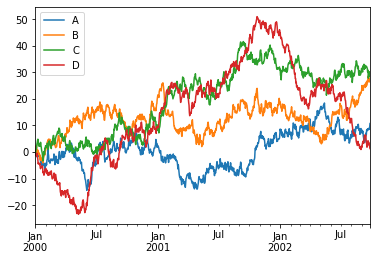

In [293]:
%matplotlib inline
import numpy as np
datos = np.random.randn(1000, 4)
index = pd.date_range('2000-01-01', periods=1000, freq='D')

df = pd.DataFrame(datos, index=index, columns=list('ABCD'))
df = df.cumsum()
#df.head(10) #primeras 10 filas
df.plot()

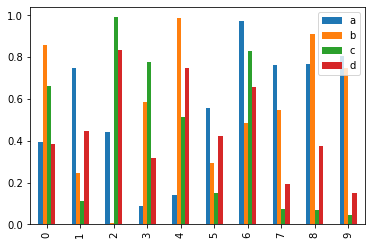

In [294]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

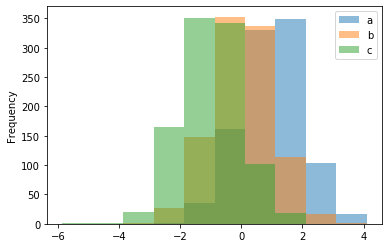

In [297]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns=['a', 'b', 'c'])
df.plot.hist(bins = 10, alpha=0.5);

## 8) Cargando datos con formato CSV, Excel, HDF5
Pandas es capaz de cargar datos desde una una variedad de distintos formatos, incluyendo:
- CSV
- JSON
- HTML
- Excel
- HDF5 format
- Feather format
- Parquet format
- Msgpack
- Stata
- SAS
- SQL

A continuación guardamos y cargamos un DataFrame en formatos CSV y Excel. Para ver más formatos, revisar https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [299]:
df = pd.DataFrame({'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
                   'year': [2000, 2001, 2002, 2001, 2002, 2003],
                   'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]})
df.head(4)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4


### 8.1) CSV

In [300]:
df.to_csv('poblacion.csv')

In [301]:
pd.read_csv('poblacion.csv', index_col=0)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


### 8.2) XLSX

In [302]:
df.to_excel('poblacion.xlsx', sheet_name='Poblacion por ciudad')

In [303]:
pd.read_excel?

In [304]:
pd.read_excel('poblacion.xlsx', index_col=0, na_values=['NA'])

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


## 9) SQL
**¿Qué es Structured Query Language, o SQL?** Es un lenguaje de comunicación con bases de datos relacionales. Se usa para seleccionar, agregar, sacar, actualizar datos con los comandos `SELECT`, `INSERT`, `UPDATE`, `DELETE`, ... SQL es un lenguaje estandardizado y es construido para usar con base de datos grandes (por ejemplo, millones de filas de datos). SQL tiene muchas implementaciones distintas, cada con su specialidad. Por ejemplo MySQL (usado mucho para sitios de web), MSSQL (de Microsoft), Oracle, Postgres, SQLite ...

El tamaño máximo de DataFrame depende de tu tamaño de memoria. Generalmente, seleccionamos solo que necesitamos con un 'query' de SQL. ¡Tienes que cuidar que no pasas la límite de tu computador!

Acá mostramos cómo seleccionar datos de un server de SQL y cargarlos en un DataFrame. SQLite es una implentación más sencilla y amigable para demostraciones. Seleccionando y cargando datos de otras implementaciones funciona de todas formas DataFrames. Con SQLite hacemos lo siguiente:

```
import sqlite3

conn = sqlite3.connect("mydatabase_filename.sqlite")
df = pd.read_sql_query("SELECT * FROM <tablename>", conn)
```

mientras para Postgres hacemos:

```
import psycopg2 as pg
import pandas.io.sql as psql

conn = pg.connect("dbname=mydatabase user=postgres")
df = psql.frame_query("SELECT * FROM <tablename>", conn)
```

In [305]:
import sqlite3

conn = sqlite3.connect("db.sqlite")
df = pd.read_sql_query("SELECT * FROM ventas_costos WHERE Costos_Fijos_IT > 100000", conn)

printbf("Número de filas:")
display(df.count())

printbf("Primeras cinco filas:")
display(df.head())

printbf("Estadísticas de la columna 'Costos_Fijos_IT':")
print(df['Costos_Fijos_IT'].describe())

**Número de filas:**

index                         6660
Id                            6660
Periodo                       6660
Ventas_IT                     6660
Otros_Ingresos_IT             6660
Costos_Fijos_IT               6660
Costos_Variables_IT           6660
Capacidad_Pago_Ajustada_IT    6660
Capacidad_Pago_IT             6660
Resultado_Operacional_IT      6660
Deudas_IT                     6660
sexo                          5363
edad                          5363
est_civil                     5363
comuna                        3102
region                        5363
act_eco_cod                   5363
act_eco_des                   5363
sec_cod                       5363
DDVI                          5363
DM                            5275
DDVE                          5275
DDC                           5275
DDVI1                         4956
DM1                           4956
DDVE1                         4956
DDC1                          4956
DDVI2                         4871
DM2                 

**Primeras cinco filas:**

,index,Id,Periodo,Ventas_IT,Otros_Ingresos_IT,Costos_Fijos_IT,Costos_Variables_IT,Capacidad_Pago_Ajustada_IT,Capacidad_Pago_IT,Resultado_Operacional_IT,...,SCP_MCE_FEC_ULT_CRD,SCP_MCE_LCR_DIS,SCP_MPD_MNT_SOL,SCP_MBU_SBS_HBT_ASG,SCP_MIC_GRP_FAM_ADL,SCP_MIC_GRP_FAM_NNO,SCP_MIC_GST_FAM_SME,SCP_MIC_OTR_GST_VIV,SCP_MIC_PRD_COS_MOB,SCP_MIC_PRD_COS_MPM
0,2,3,201601,2650972,107927,385000,1423333,271055,451759,842639,...,9999-12-31,0,1000000,0,2,0,300000,0,0.0,1.400000e+38
1,3,4,201601,3926041,0,578000,2100000,638155,638155,1248041,...,2015-05-08,1794000,3000000,0,2,0,300000,0,0.0,3.900000e+33
2,4,5,201601,3707743,0,1141180,1360000,638683,638683,1206563,...,2013-12-23,615000,8000000,0,3,1,450000,0,0.0,1.150000e+34
3,12,13,201601,4155904,425000,150000,2880208,289214,723036,1125696,...,2013-09-16,426000,1300000,0,2,0,200000,0,0.0,2.800000e+38
4,16,17,201601,1663259,140000,111025,1220000,224317,224317,332234,...,2013-03-06,0,3000000,0,2,0,200000,0,0.0,8.000000e+31


**Estadísticas de la columna 'Costos_Fijos_IT':**

count    6.660000e+03
mean     6.232622e+05
std      1.121243e+06
min      1.001250e+05
25%      1.690922e+05
50%      3.120000e+05
75%      6.512500e+05
max      2.520000e+07
Name: Costos_Fijos_IT, dtype: float64


In [102]:
display(df.head(20))

,index,Id,Periodo,Ventas_IT,Otros_Ingresos_IT,Costos_Fijos_IT,Costos_Variables_IT,Capacidad_Pago_Ajustada_IT,Capacidad_Pago_IT,Resultado_Operacional_IT,...,SCP_MCE_FEC_ULT_CRD,SCP_MCE_LCR_DIS,SCP_MPD_MNT_SOL,SCP_MBU_SBS_HBT_ASG,SCP_MIC_GRP_FAM_ADL,SCP_MIC_GRP_FAM_NNO,SCP_MIC_GST_FAM_SME,SCP_MIC_OTR_GST_VIV,SCP_MIC_PRD_COS_MOB,SCP_MIC_PRD_COS_MPM
0,2,3,201601,2650972,107927,385000,1423333,271055,451759,842639,...,9999-12-31,0,1000000,0,2,0,300000,0,0.000000e+00,1.400000e+38
1,3,4,201601,3926041,0,578000,2100000,638155,638155,1248041,...,2015-05-08,1794000,3000000,0,2,0,300000,0,0.000000e+00,3.900000e+33
2,4,5,201601,3707743,0,1141180,1360000,638683,638683,1206563,...,2013-12-23,615000,8000000,0,3,1,450000,0,0.000000e+00,1.150000e+34
3,12,13,201601,4155904,425000,150000,2880208,289214,723036,1125696,...,2013-09-16,426000,1300000,0,2,0,200000,0,0.000000e+00,2.800000e+38
4,16,17,201601,1663259,140000,111025,1220000,224317,224317,332234,...,2013-03-06,0,3000000,0,2,0,200000,0,0.000000e+00,8.000000e+31
5,17,18,201601,1425577,47500,100421,906667,113208,113208,418489,...,2015-04-16,0,500000,0,3,0,250000,0,0.000000e+00,2.300000e+33
6,18,19,201601,1763891,0,255161,1120000,92264,115330,388730,...,2013-02-13,0,500000,0,2,0,200000,0,0.000000e+00,1.000000e+33
7,21,22,201601,3217760,0,507000,1297304,449982,1124956,1413456,...,9999-12-31,525000,1000000,0,2,0,250000,0,0.000000e+00,3.000000e+19
8,22,23,201601,1538000,510000,135000,20994,481281,481281,1382006,...,2015-06-30,3461000,13000000,0,2,0,500000,0,0.000000e+00,2.000000e+04
9,23,24,201601,2950000,0,145561,1672650,686673,686673,1131789,...,2015-08-11,15000,30000000,0,2,0,300000,0,0.000000e+00,1.500000e+34
